### 1번

한 화학공정에서 온도와 수율에 관한 실험으로부터 다음과 같은 데이터가 얻어졌다고 하자.

xi = [-5, -4, -3, -2, -1, 0, 1,  2,  3,  4,  5]  
yi = [ 1,  5,  4,  7, 10, 8, 9, 13, 14, 13, 18]

단순 선형 회귀모형  
<img src="https://latex.codecogs.com/svg.image?y_i=\beta_0&plus;\beta_1\cdot&space;x_i&plus;u_i,\;\;i=1,2,\cdots,11,\;\;u_i\sim&space;iid\;N(0,\sigma^2)">  
을 가정하고 다음 물음에 답하여라.

(1) 최소제곱법에 의해서 단순 선형 회귀 모형을 적합하여라.

beta_0: 9.273 
beta_1: 1.436

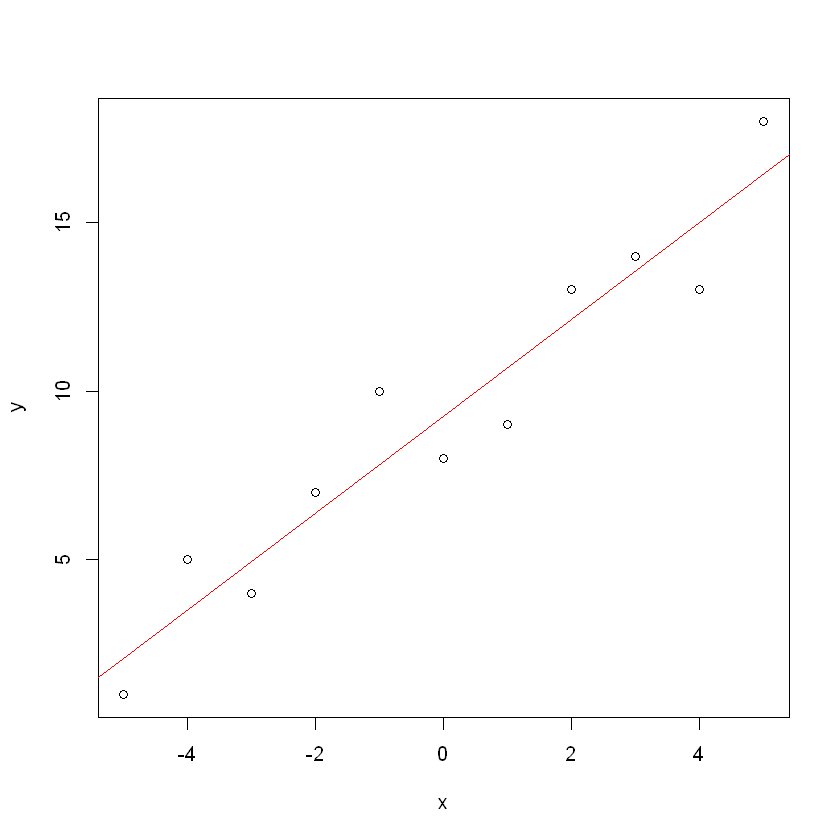

In [69]:
x = c(-5:5)
y = c(1,5,4,7,10,8,9,13,14,13,18)

x_bar = mean(x)
y_bar = mean(y)

S_xy = sum((x-x_bar)*(y-y_bar)) 
S_xx = sum((x-x_bar)^2)

beta_1 = S_xy / S_xx
beta_0 = y_bar - beta_1 * x_bar

cat("beta_0:", round(beta_0, 3), "\n")
cat("beta_1:", round(beta_1, 3))

# 산점도 그리기
plot(x, y)

# 적합된 선 그리기
abline(result, col = "red")

적합된 단순 선형 회귀 모형은 다음과 같다.  
<img src="https://latex.codecogs.com/svg.image?\hat{y_i}=9.273&plus;1.436\cdot\hat{x_i}">

(2) <img src="https://latex.codecogs.com/svg.image?H_0:\beta_1=0">을 유의수준 α=0.05 하에서 검정하여라.

In [43]:
result = lm(y~x)
anova(result)


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x,1,226.94545,226.945455,96.17979,4.206951e-06
Residuals,9,21.23636,2.359596,NA,NA


분산분석 결과 P-value가 0.05보다 작은 값이므로 귀무가설은 기각된다.

(3) β1 와 x=3에서의 y 값에 대한 신뢰 구간을 구하여라

In [65]:
input_data = data.frame(x=3)
predict(result, newdata=input_data, int='c') # 신뢰구간
predict(result, newdata=input_data, int='p') # 예측구간

,fit,lwr,upr
1,13.58182,12.13764,15.026


,fit,lwr,upr
1,13.58182,9.818767,17.34487


적합된 단순 선형 회귀모형에서 x=3 일 때의 신뢰 구간은 (12.138 ~ 15.026) 이다.

### 2번

어떤 공정에서 나오는 제품의 강도가 그 공정의 온도와 압력에 대한 영향을 받는가를 조사하기 위하여 다음의 데이터를 얻었다.

공정온도 x1 = (195, 179, 205, 204, 201, 184, 210, 209)  
공정압력 x2 = (57, 61, 60, 62, 61, 54, 58, 61)  
강도 y = (81.4, 122.2, 101.7, 175.5, 150.3, 64.8, 92.1, 113.8)  

(A) 선형회귀모형, <img src="https://latex.codecogs.com/svg.image?y_i=\beta_0&plus;\beta_1&space;x_{1i}&plus;\beta_2&space;x_{2i}&plus;u_i,\;\;i=1,2,\cdots,8,\;\;u_i\sim^{iid}N(0,\sigma^2)">이 성립된다고 가정하고 데이터로부터 회귀계수를 추정하라.

In [71]:
x1 = c(195, 179, 205, 204, 201, 184, 210, 209)
x2 = c(57, 61, 60, 62, 61, 54, 58, 61)
y = c(81.4, 122.2, 101.7, 175.5, 150.3, 64.8, 92.1, 113.8)

result = lm(y~x1+x2)
result


Call:
lm(formula = y ~ x1 + x2)

Coefficients:
(Intercept)           x1           x2  
  -553.9879      -0.1799      11.8549  
